In [683]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

import statistics
from sklearn.preprocessing import MinMaxScaler


random_state = 42
train_size = 0.7

<h2>Importing and exploring the dataset</h2>

At first glance we can already see that some columns have numerical values while other seem to have categorical data.
<br>
Some raws contain missing values.

In [684]:
url = "direct_matching_20240213.csv"
df_raw = read_csv(url, sep=";", header=0)

df_raw.head(n=10)

,cand_id,job_id,distance_km,match_score,match_rank,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,cand_education,job_contract_type,job_professional_category,job_sector,job_work_province
0,"5,664,912",OFF_1011_1427,32.327042,99.573387,1,Male,45-54,UD,FRIULI VENEZIA GIULIA,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
1,"4,999,120",OFF_1011_1427,15.595593,99.210564,2,Male,35-44,UD,FRIULI VENEZIA GIULIA,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
2,"5,413,671",OFF_1011_1427,31.348877,99.118614,3,Female,45-54,UD,FRIULI VENEZIA GIULIA,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
3,"5,965,090",OFF_1011_1427,66.315598,97.409767,4,Male,15-24,TS,FRIULI VENEZIA GIULIA,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
4,"5,771,219",OFF_1011_1427,15.595593,97.323875,5,Female,35-44,UD,FRIULI VENEZIA GIULIA,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
5,"2,216,205",OFF_1011_1427,24.946939,96.922318,6,Male,55-74,UD,FRIULI VENEZIA GIULIA,Diploma / Accademia : Geometra,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
6,"4,594,051",OFF_1011_1427,27.959969,96.245216,7,Male,55-74,UD,FRIULI VENEZIA GIULIA,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
7,"5,148,878",OFF_1011_1427,25.512180,96.235245,8,Male,25-34,UD,FRIULI VENEZIA GIULIA,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
8,"5,933,345",OFF_1011_1427,28.856832,96.009712,9,Female,45-54,GO,FRIULI VENEZIA GIULIA,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD
9,"7,204,128",OFF_1011_1427,31.348877,95.802277,10,Female,35-44,UD,FRIULI VENEZIA GIULIA,NaN,Lavoro subordinato,Geometra e tecnico di costruzioni civili e ind...,Progettisti / Design / Grafici,UD


There are some things to change like the candidate education (lots of NaN values) and decide the target column.

In [685]:
df_raw.count()

cand_id                      8647
job_id                       8647
distance_km                  8647
match_score                  8647
match_rank                   8647
cand_gender                  8647
cand_age_bucket              8646
cand_domicile_province       8644
cand_domicile_region         8642
cand_education               2341
job_contract_type            8647
job_professional_category    8647
job_sector                   8647
job_work_province            8647
dtype: int64

In [686]:
n_jobs = df_raw["job_id"].nunique()
print("number of unique jobs:", n_jobs)

number of unique jobs: 865


In [687]:
df_raw[df_raw["cand_domicile_province"].isna()]

,cand_id,job_id,distance_km,match_score,match_rank,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,cand_education,job_contract_type,job_professional_category,job_sector,job_work_province
627,"5,449,407",OFF_1745_0198,34.129036,99.759705,9,Male,35-44,NaN,CAMPANIA,NaN,Lavoro subordinato,Carrellista/Mulettista,Magazzino / Logistica / Trasporti,MN
4493,"5,262,317",OFF_789_0870,80.433472,99.623642,6,Male,25-34,NaN,CAMPANIA,NaN,Lavoro subordinato,analista finanziario/analista finanziaria,Banche / Assicurazioni / Istituti di Credito,FI
8301,"6,523,103",ORD_48061_0590,82.721603,96.154732,5,Male,15-24,NaN,NaN,NaN,Lavoro subordinato,Operaio Generico Elettronico/ Elettrotecnico,Operai Generici,BZ


From what we can see here, there is some missing data (we have 8647 candidates and 8644 domicile provinces) so I've decided to drop the missing data raws except for "cand_education" where I replace missing values with "no info" for those candidates that haven't specified their education.

Being that "match_score" and "match_rank" are the columns that describe a candidate-job match we must chose 1 and therefore solve the classification/regression problem. "match_score" is the more appropriate column and we proceed to drop the other one.

On the other hand "cand_id" is not useful for the matching and the details of the candidate are described by other columns.
Same for "job_id".

Now the dataset is clean and ready to be used.

In [688]:
target = "match_score"
df_clean = df_raw.copy()

df_clean["cand_education"] = df_clean["cand_education"].fillna(value="no info")
df_clean = df_clean.dropna()
df_clean = df_clean.drop(["cand_id", "job_id", "match_rank"], axis=1)

df_clean.count()

distance_km                  8639
match_score                  8639
cand_gender                  8639
cand_age_bucket              8639
cand_domicile_province       8639
cand_domicile_region         8639
cand_education               8639
job_contract_type            8639
job_professional_category    8639
job_sector                   8639
job_work_province            8639
dtype: int64

Now we want to predict the data with a regressor so we shall transform strings to numerical data that can be handled.

In [689]:
print("age ranges:", df_clean["cand_age_bucket"].unique())

numerical_columns = ["distance_km", "match_score"]
categorical_columns = df_clean.drop(numerical_columns, axis=1).columns

age ranges: ['45-54' '35-44' '15-24' '55-74' '25-34']


In [690]:
print("\nnumber of categories per column:")
df_clean[categorical_columns].nunique()


number of categories per column:


cand_gender                    2
cand_age_bucket                5
cand_domicile_province        78
cand_domicile_region          18
cand_education               434
job_contract_type              3
job_professional_category    247
job_sector                    26
job_work_province             53
dtype: int64

We encode the data with a label encoder and save each encoder in a disctionary in case we need to decode the same data in the future.

In [691]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()
l_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    l_encoders[column] = le

Now the categorical columns have been encoded and df is the dataframe I can use for a regressor

In [692]:
print("shape:",df_encoded.shape)
df_encoded.head()

shape: (8639, 11)


,distance_km,match_score,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,cand_education,job_contract_type,job_professional_category,job_sector,job_work_province
0,32.327042,99.573387,1,3,71,4,433,0,76,22,48
1,15.595593,99.210564,1,2,71,4,433,0,76,22,48
2,31.348877,99.118614,0,3,71,4,433,0,76,22,48
3,66.315598,97.409767,1,0,69,4,433,0,76,22,48
4,15.595593,97.323875,0,2,71,4,433,0,76,22,48


<h2>Regression</h2>

In [693]:
X = df_encoded.drop(target ,axis = 1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=train_size)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6047, 10) (2592, 10) (6047,) (2592,)


In [694]:
# training a Decision Tree 
model = DecisionTreeRegressor(random_state=random_state)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# looking at the initial results
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R^2 Score: -0.25
Mean Squared Error: 1.20
Root Mean Squared Error: 1.10
Mean Absolute Error: 0.24


The results are pretty poor, let's explore the dataset more.

In [695]:
df_encoded.describe()

,distance_km,match_score,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,cand_education,job_contract_type,job_professional_category,job_sector,job_work_province
count,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000
mean,29.754485,99.634336,0.550990,1.892349,38.905660,8.214955,370.336150,0.688969,136.567195,14.744878,27.001852
std,23.484031,1.071206,0.497422,1.168977,23.536162,4.351507,123.640476,0.949236,68.003542,5.320387,15.734351
min,0.000000,69.610825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.252331,99.677177,0.000000,1.000000,11.000000,7.000000,407.000000,0.000000,89.000000,12.000000,9.000000
50%,23.437698,99.856194,1.000000,2.000000,38.000000,7.000000,433.000000,0.000000,126.000000,18.000000,26.000000
75%,41.751572,99.932739,1.000000,3.000000,59.000000,10.000000,433.000000,2.000000,203.000000,18.000000,41.000000
max,99.966797,99.999214,1.000000,4.000000,77.000000,17.000000,433.000000,2.000000,246.000000,25.000000,52.000000


The distance seem skewed a bit to the left but overall it seems fine

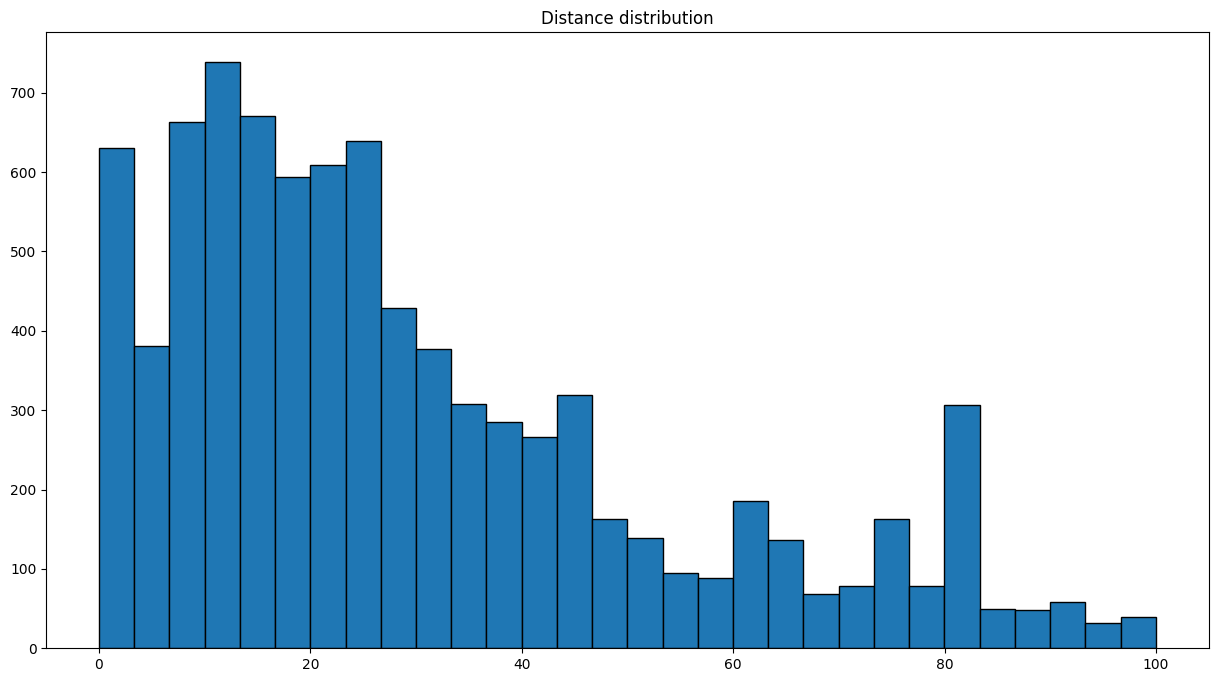

In [696]:
plt.figure(figsize=(15,8))
df_encoded["distance_km"].hist(bins=30, edgecolor="black", grid=False)
plt.title("Distance distribution")
plt.show()

Even with the logarithmic scale we can see that the values of the target column "match_score" are skewed towards the high end (92-100 range).

This could mean that the outliers make the regression difficult.

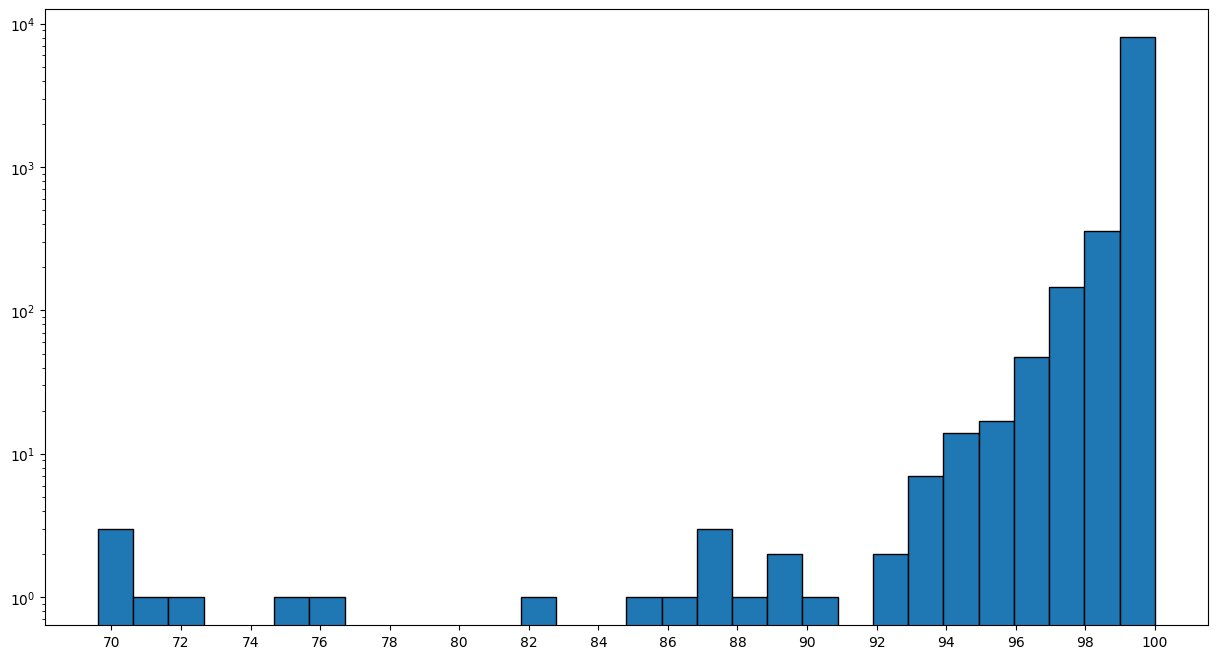

In [697]:
plt.figure(figsize=(15,8))
plt.hist(df_encoded["match_score"], bins=30, edgecolor="black")

plt.locator_params(axis="x", nbins=30, tight=True)
plt.yscale("log")
plt.show()

Let's use the IQR technique where we keep only a part of the total dataset.

In [698]:
Q1 = df_encoded["match_score"].quantile(0.25)
Q3 = df_encoded["match_score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:",Q1)
print("Q3:",Q3)
print("IQR:",IQR)
print(f"IQR range: {lower_bound:.3f} - {upper_bound:.3f}")
print()

df_filtered = df_encoded[(df_encoded["match_score"] >= lower_bound) & (df_encoded["match_score"] <= upper_bound)]
print(f"number of raws in the filtered dataframe: {df_filtered.shape[0]}")
print(f"number of deleted raws: {df_encoded.shape[0]-df_filtered.shape[0]}")

Q1: 99.67717743
Q3: 99.93273926
IQR: 0.2555618300000049
IQR range: 99.294 - 100.316

number of raws in the filtered dataframe: 7711
number of deleted raws: 928


Let's take a look at the target column post IQR method

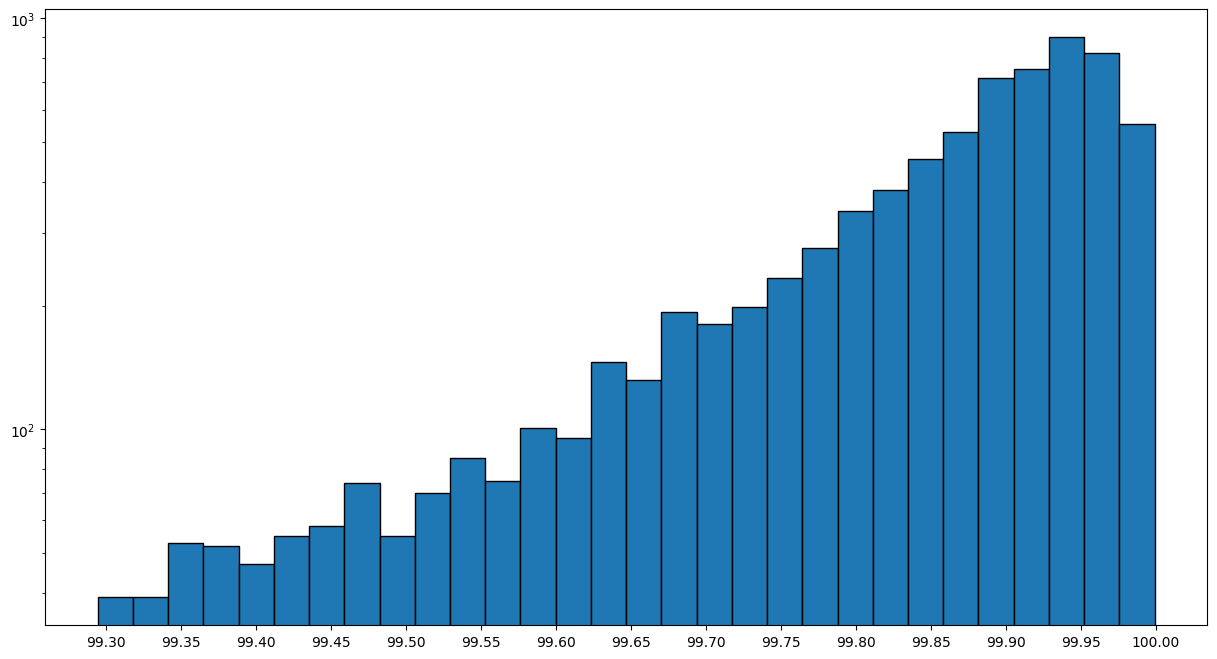

In [699]:
plt.figure(figsize=(15,8))
plt.hist(df_filtered["match_score"], bins=30, edgecolor="black")

plt.locator_params(axis="x", nbins=30, tight=True)
plt.yscale("log")
plt.show()

<h3>Feature importance</h3>
Another thing we can do is looking for the worst and more useless feature for the regressor and eliminate them.
We'll try the feature importance on several regressors.

<Axes: >

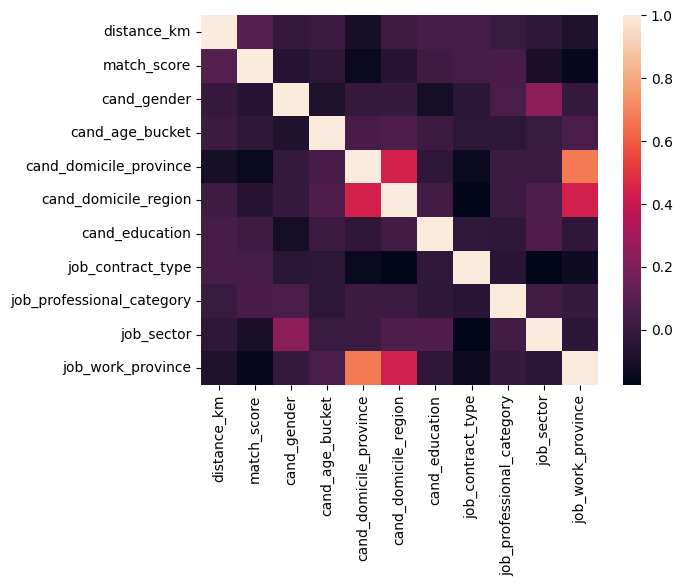

In [700]:
sns.heatmap(df_filtered.corr())

With the following function we'll permutate one column at a time and look how much the MAE changes. If the change is small it means that the column isn't doing much for the regression and it can be eliminated.

In [701]:
def show_feature_importances(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    result = permutation_importance(model, X_test, y_test, n_repeats=15, random_state=random_state, n_jobs=-1)
    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(
        result.importances[sorted_importances_idx].T,
        columns=X_train.columns[sorted_importances_idx],
    )
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title("Permutation Importances (test set)")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in score")

In [702]:
X_fi = df_filtered.drop(target ,axis = 1)
y_fi = df_filtered[target]

X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_fi, y_fi, random_state=random_state, train_size=train_size)

print(X_train_fi.shape, X_test_fi.shape, y_train_fi.shape, y_test_fi.shape)

(5397, 10) (2314, 10) (5397,) (2314,)


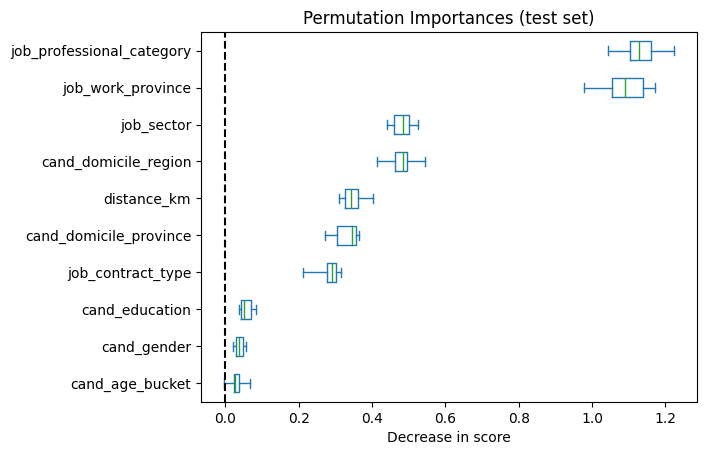

In [703]:
model = DecisionTreeRegressor(random_state=random_state)
show_feature_importances(model, X_train_fi, y_train_fi, X_test_fi, y_test_fi)

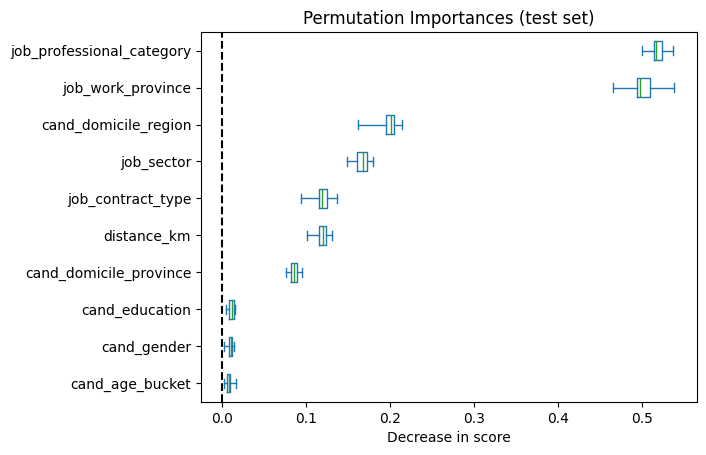

In [704]:
model = RandomForestRegressor(random_state=random_state)
show_feature_importances(model, X_train_fi, y_train_fi, X_test_fi, y_test_fi)

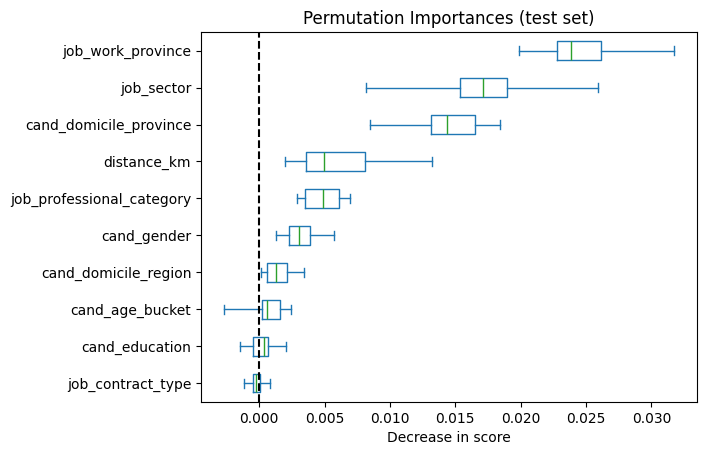

In [705]:
model = model = LinearRegression()
show_feature_importances(model, X_train_fi, y_train_fi, X_test_fi, y_test_fi)

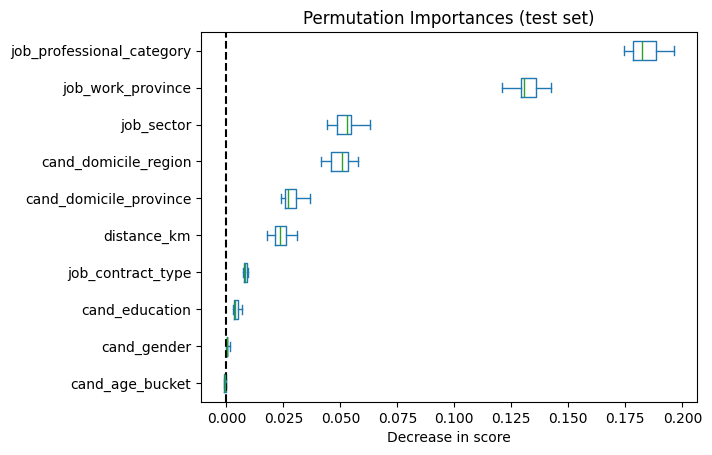

In [706]:
model = model = GradientBoostingRegressor(random_state=random_state)
show_feature_importances(model, X_train_fi, y_train_fi, X_test_fi, y_test_fi)

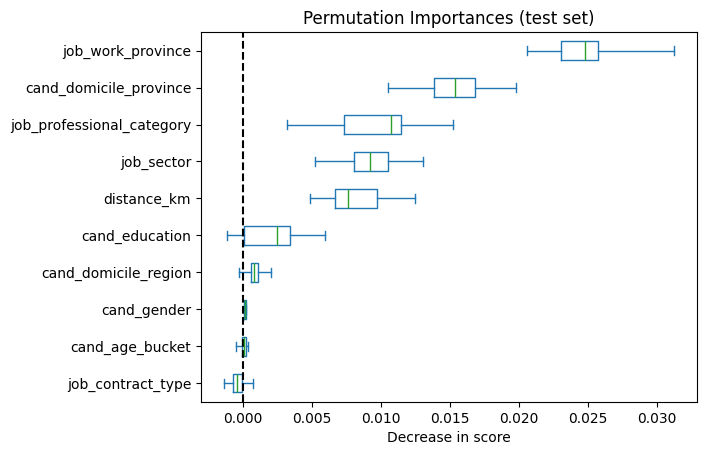

In [707]:
model = SVR()
show_feature_importances(model, X_train_fi, y_train_fi, X_test_fi, y_test_fi)

All the models agree that the three less important features are "job_contract_type", "cand_age_bucket" and "cand_gender" therefore I drop these columns from the dataset and keep only the most important features.

In [708]:
X = df_filtered.drop([target, "cand_age_bucket", "cand_gender", "cand_education"] ,axis = 1)
y = df_filtered[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=train_size)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5397, 7) (2314, 7) (5397,) (2314,)


<h2>Model comparison</h2>
We'll test 5 models and see the metrics for:
    <li>DecisionTreeRegressor</li>
    <li>RandomForestRegressor</li>
    <li>LinearRegression</li>
    <li>GradientBoostingRegressor</li>
    <li>SVR</li>

In [709]:
# print error histogram
def show_errors(y_test, y_pred):
    errors = y_test - y_pred
    errors = abs(errors.values)
    
    plt.figure(figsize=(15, 8))
    plt.hist(errors, bins=20, color="lightgreen" ,edgecolor="black")
    plt.title("Error distribution")
    
    max = int(np.max(errors))
    plt.locator_params(axis="x", nbins=20, tight=True)
    plt.locator_params(axis="y", nbins=20, tight=True)
    plt.show()

# print MAE R^2 MSE RMSE
def print_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"R^2 Score: {r2:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"Root Mean Squared Error: {rmse:.3f}")
    print(f"Mean Absolute Error: {mae:.3f}")


<h3>DecisionTreeRegressor<h3>

R^2 Score: 0.380
Mean Squared Error: 0.014
Root Mean Squared Error: 0.120
Mean Absolute Error: 0.070


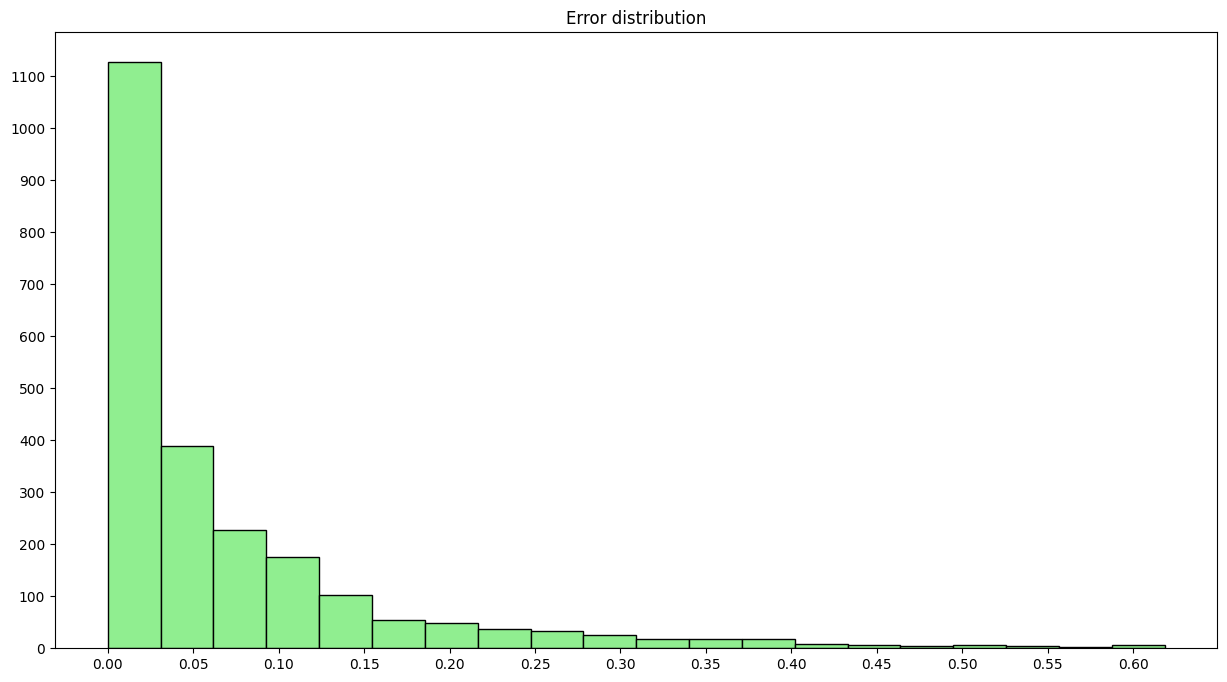

In [710]:
model = DecisionTreeRegressor(random_state=random_state)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_metrics(y_test, y_pred)
show_errors(y_test, y_pred)

<h3>RandomForestRegressor<h3>

R^2 Score: 0.576
Mean Squared Error: 0.010
Root Mean Squared Error: 0.099
Mean Absolute Error: 0.063


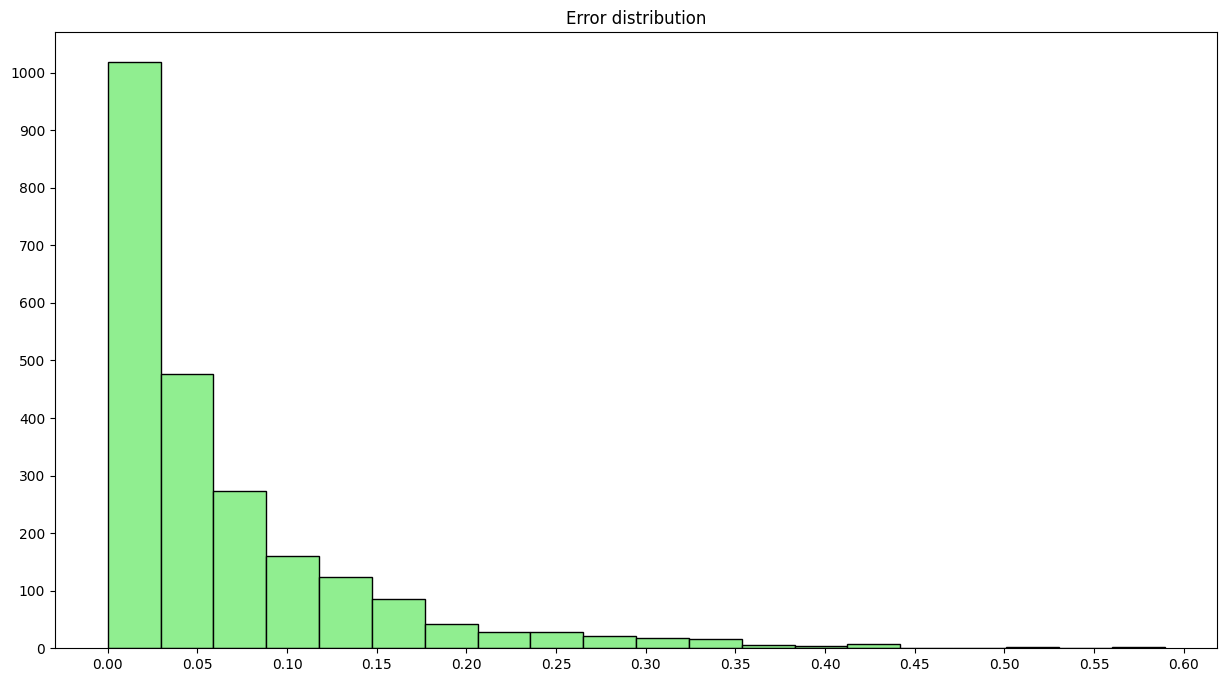

In [711]:
model = RandomForestRegressor(random_state=random_state)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_metrics(y_test, y_pred)
show_errors(y_test, y_pred)

<h3>LinearRegression<h3>

R^2 Score: 0.039
Mean Squared Error: 0.022
Root Mean Squared Error: 0.149
Mean Absolute Error: 0.115


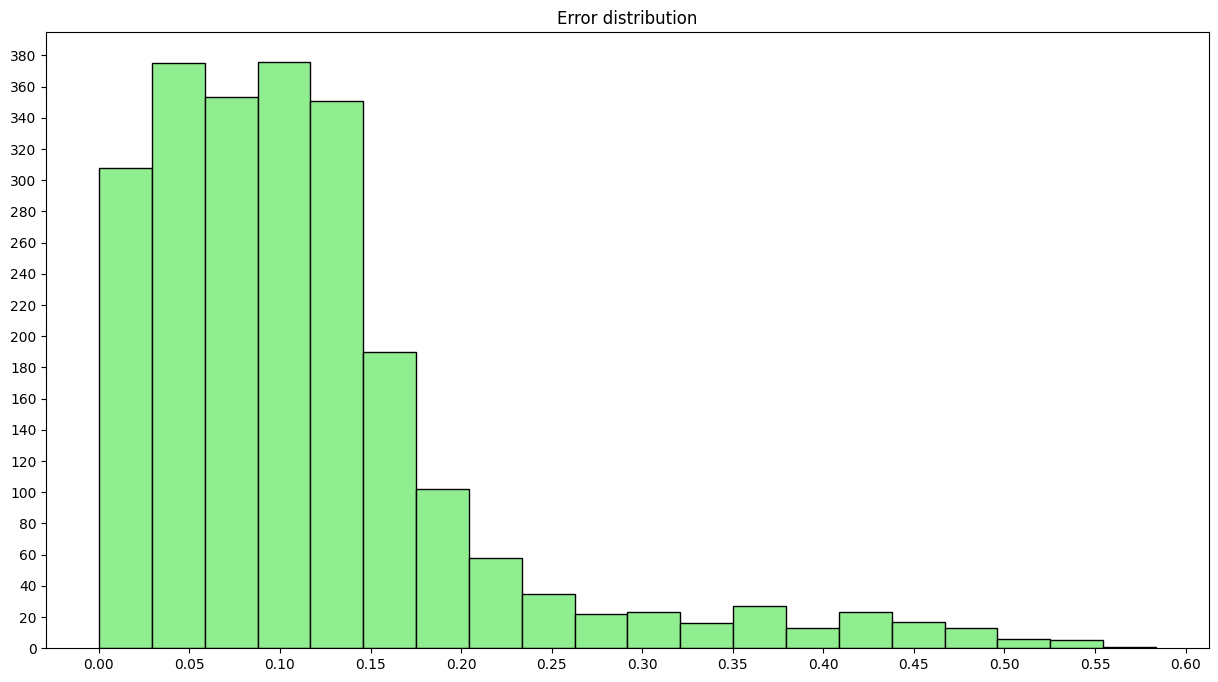

In [714]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_metrics(y_test, y_pred)
show_errors(y_test, y_pred)

<h3>GradientBoostingRegressor<h3>

R^2 Score: 0.306
Mean Squared Error: 0.016
Root Mean Squared Error: 0.127
Mean Absolute Error: 0.094


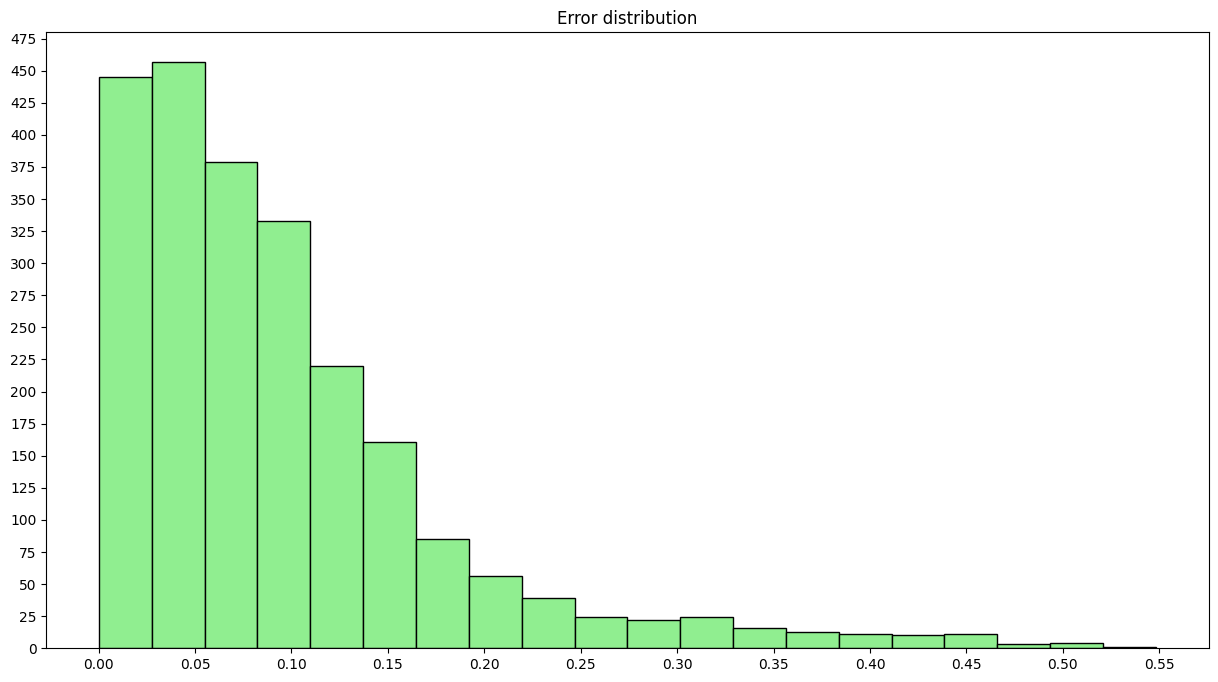

In [715]:
model = GradientBoostingRegressor(random_state=random_state)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_metrics(y_test, y_pred)
show_errors(y_test, y_pred)

<h3>SVR</h3>

R^2 Score: 0.069
Mean Squared Error: 0.021
Root Mean Squared Error: 0.147
Mean Absolute Error: 0.109


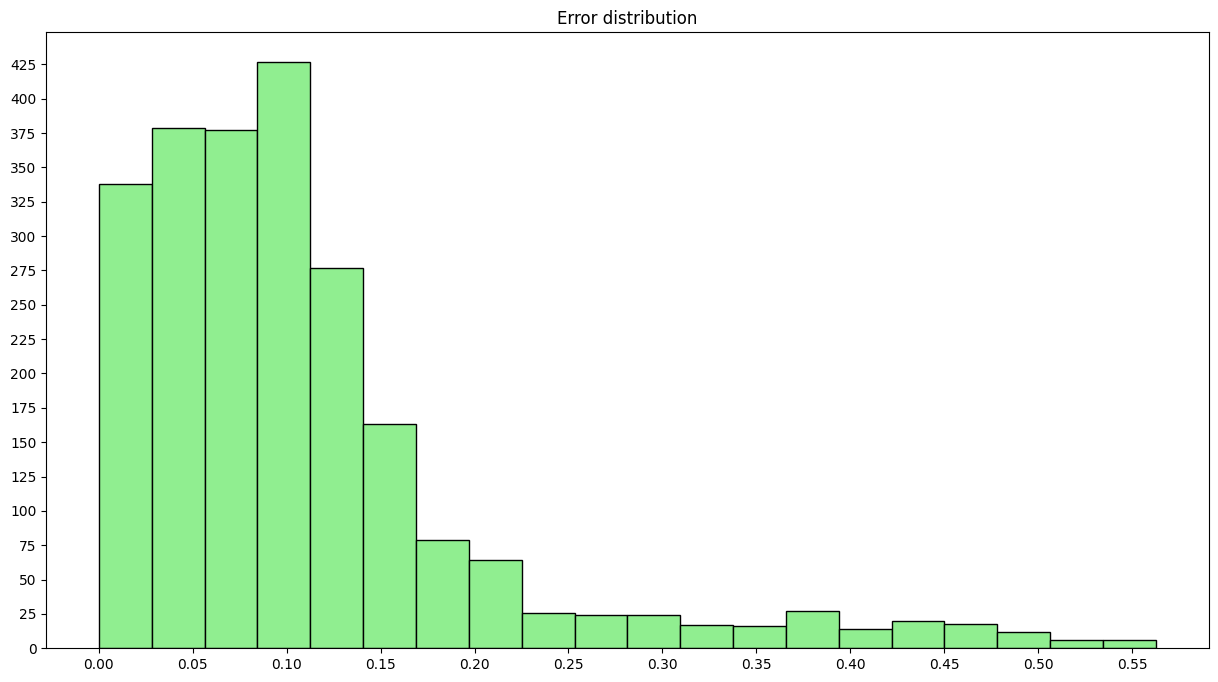

In [716]:
model = SVR()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_metrics(y_test, y_pred)
show_errors(y_test, y_pred)

<h2>Fairness</h2>

In [717]:
model = RandomForestRegressor(random_state=random_state)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# attaching the original indexes to the pedicted values
scaler = MinMaxScaler()
y_pred_scaled = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()
y_pred_indexed = pd.Series(data=y_pred_scaled, index=y_test.index)
y_pred_indexed.shape

(2314,)

In orter to analize fairness we need to discretize the "distance_km" column, whitch is the only one containing continous values.

In [718]:
X_test_discretized = X_test.copy()
X_test_discretized["distance_km"] = pd.cut(X_test["distance_km"],
                                           bins=[-1,20,40,60,80,101],
                                           labels=["very close", "close", "mid", "far", "very far"])
le = LabelEncoder()
X_test_discretized["distance_km"] = le.fit_transform(X_test_discretized["distance_km"])
l_encoders["distance_km"] = le
X_test_discretized.head()

,distance_km,cand_domicile_province,cand_domicile_region,job_contract_type,job_professional_category,job_sector,job_work_province
5817,3,11,7,0,81,5,9
7700,3,49,13,0,125,18,34
5502,3,67,14,0,187,18,45
2808,2,34,5,0,206,8,40
4775,3,7,7,0,126,18,5


These two functions will calculate the Disparate Impact and Statistical Parity for all categories in a column.

In [719]:
def fairness_statistics(column, category):
    A = X_test_discretized[X_test_discretized[column]==category]
    nonA = X_test_discretized[X_test_discretized[column]!=category]
    
    X_test_discretized_A = X_test_discretized[X_test_discretized[column]==category]
    X_test_discretized_nonA = X_test_discretized[X_test_discretized[column]!=category]
    
    y_pred_A = y_pred_indexed[X_test_discretized_A.index]
    y_pred_nonA = y_pred_indexed[X_test_discretized_nonA.index]
    
    mean_A = statistics.mean(y_pred_A)
    mean_nonA = statistics.mean(y_pred_nonA)
    
    return [mean_A/mean_nonA, mean_A-mean_nonA]

def fairness_statistics_df(df_column):
    result = pd.DataFrame(columns=["category name","disparate impact", "statistical parity", "occurrences"])
    for category_number in df_column.unique():
        category_name = l_encoders[df_column.name].inverse_transform([category_number])[0]
        fs = fairness_statistics(df_column.name, category_number)
        occ = len(df_column[df_column==category_number])
        result.loc[len(result)] = [category_name, fs[0], fs[1], occ]
    return result

We can see some categories that have more than 10% Disparate Impact. 
UMBRIA and SARDEGNA have ratings way below average while having few occurrences.
On the other hand LOMBARDIA has the most occurences and a rating 11% above the averege.

In [720]:
fairness_statistics_df(X_test_discretized["cand_domicile_region"])

,category name,disparate impact,statistical parity,occurrences
0,LOMBARDIA,1.118781,0.081817,1111
1,TOSCANA,1.056150,0.040824,59
2,TRENTINO ALTO ADIGE,0.911309,-0.064661,35
3,LAZIO,1.030273,0.022015,90
4,EMILIA ROMAGNA,0.961477,-0.028201,326
5,FRIULI VENEZIA GIULIA,0.723345,-0.203769,96
6,PIEMONTE,0.959186,-0.029834,224
7,VENETO,0.926148,-0.054306,309
8,MARCHE,0.866137,-0.097599,24
9,VALLE D'AOSTA,1.298632,0.217235,7


Looking at the discretized distances we can see that only the "very far" has a Disparate Impact greater than 10%.

In [721]:
fairness_statistics_df(X_test_discretized["distance_km"])

,category name,disparate impact,statistical parity,occurrences
0,very close,0.976662,-0.017161,976
1,mid,0.999142,-0.000624,299
2,close,0.960962,-0.028763,700
3,far,1.068298,0.049428,205
4,very far,1.160934,0.116093,134


In [96]:
param_grid = {
    "max_depth": [*range(1,20)],
    "min_samples_split": [*range(2,10,2)]
}

clf = GridSearchCV(DecisionTreeRegressor(random_state=random_state), param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

best = clf.best_estimator_
y_pred = best.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

{'max_depth': 19, 'min_samples_split': 8}
-0.0819029920258869
R^2 Score: 0.36850601117250137


In [97]:
param_grid = {
    "n_estimators": [5, 25 ,50, 75, 100],
    "max_depth": [*range(4,20,4)],
    "min_samples_split": [*range(2,10,2)]
}

clf = GridSearchCV(RandomForestRegressor(random_state=random_state), param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

best = clf.best_estimator_
y_pred = best.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

{'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 100}
-0.07581875643328423
R^2 Score: 0.5548512133120909


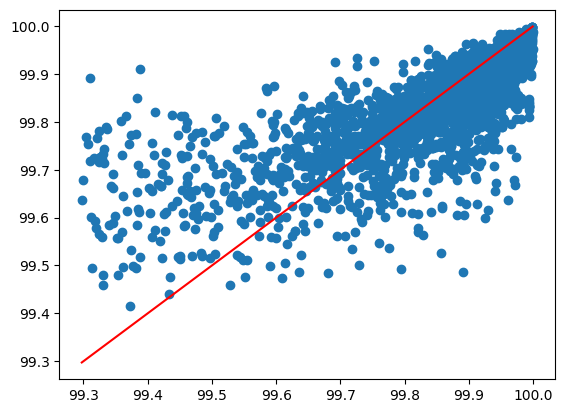

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=1)

plt.scatter(y_test,y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()], color= 'red')
plt.show()